#Notebook réalisé par :


*  Ilyas Chahed
* François Coustau-Guilhou
*   Inès Gendrot
* Yassine Saoud
* Abir Zghidi



# **Présentation de modèles de prédiction du prix des maisons**

###Importation des packages nécessaires



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

##Nettoyage de la DataSet

In [ ]:
df_houses = pd.read_csv('https://raw.githubusercontent.com/BriceNW/UE_AAA/main/housing.csv')
df_houses

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
#Première description des données numériques de la dataset
df_houses.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
#vérification des types des données
df_houses.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

**Recherche de valeurs nulles**

In [ ]:
df_houses.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df_houses['total_bedrooms'].isna().sum()/len(df_houses)

0.01002906976744186

In [ ]:
#On regarde la corrélation pour vérifier l'importance des valeurs de la colonne total_bedrooms
#(s'ils vont participer à la prédiction du prix des maisons )
df_houses.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

**Deux approches proposées:**

*   Suppression de la colonne total_bedrooms
*   Remplacement des valeurs nulles par des valeurs calculées à travers le rapport moyen entre total_rooms et total_bedrooms



In [ ]:
#puisque la colonne total_bedrooms contient des valeurs nulles mais qu'elle est en forte coorélation avec total_rooms
#ainsi le pourcentage de ces valeurs est de 1%
#on fait le choix de la supprimer
#df_houses.drop([df_houses.columns[4]], axis=1, inplace=True)

In [ ]:
rapport = 0
count =0
for i in range(df_houses.shape[0]):
  if not math.isnan(df_houses.total_bedrooms[i]):
    rapport += df_houses.total_bedrooms[i]/df_houses.total_rooms[i]
    count +=1
print(rapport)
print(count)
rapport = rapport/count
print(rapport)

for i in range(df_houses.shape[0]):
  if math.isnan(df_houses.total_bedrooms[i]):
    df_houses.total_bedrooms[i] = df_houses.total_rooms[i]*rapport

#df_houses.head()

4353.022423215211
20433
0.21303883048085015


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#vérification de valeurs nulles
df_houses.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

:On se focalise sur la colonne Ocean_proximity pour transférer ces valeurs en données exploitables pour notre étude

In [ ]:
df_houses['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
#Création d'une colonne qui traduit ocean proximity en nombre
df_houses['proximity'] = df_houses['ocean_proximity'].apply(lambda x: 0 if x =='INLAND' else 1 if x == '<1H OCEAN' else 2 if x == 'NEAR BAY' else 3 if x=='NEAR OCEAN' else 4)

In [ ]:
#changement de type en float
df_houses.proximity = df_houses.proximity.astype(float)

In [ ]:
df_houses.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
proximity             float64
dtype: object

Vérification des doublons

In [ ]:
#vérification de doublons
df_houses.duplicated().unique()

array([False])

#vérification des outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


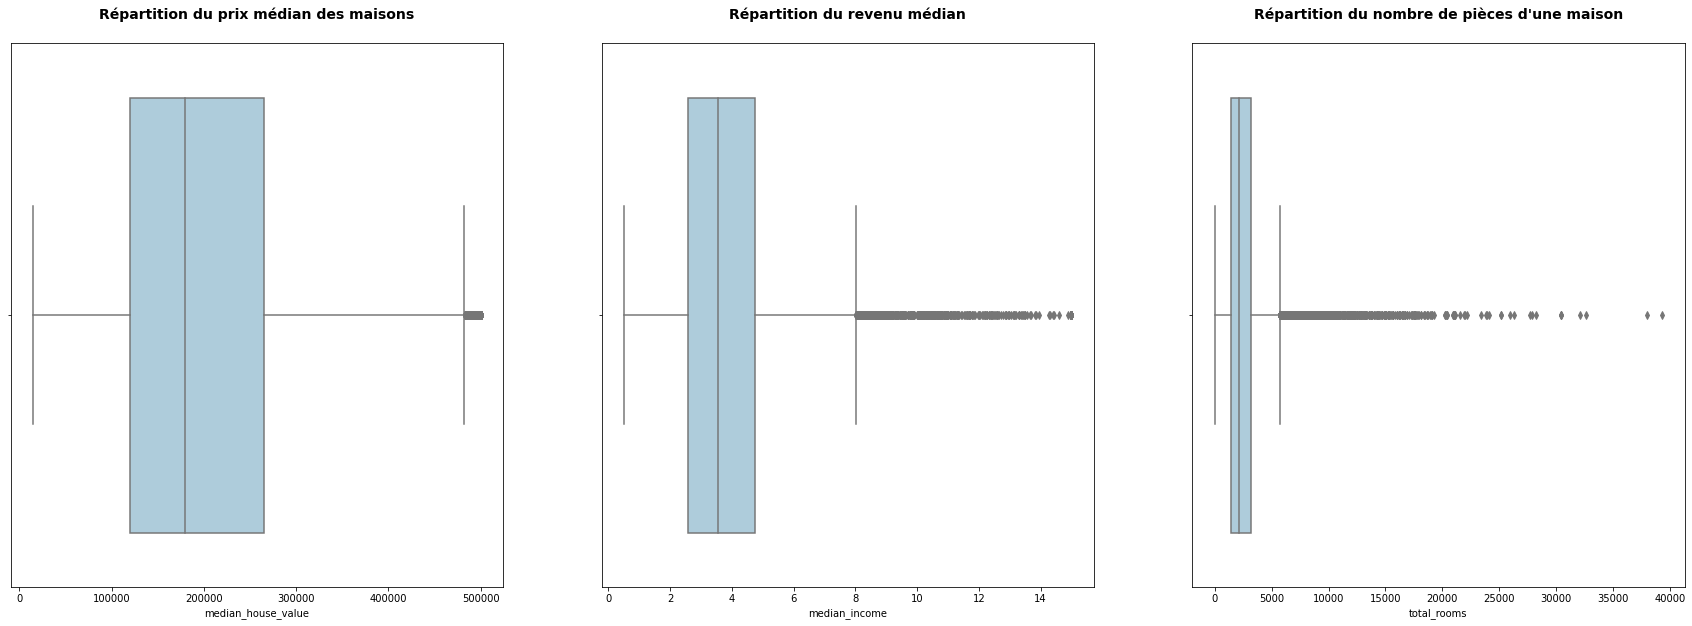

In [ ]:
fig = plt.subplots(1, 3, figsize=(30, 10))
sns.set_palette("Paired")

plt.subplot(1, 3, 1)
explode = [0, 0, 0.1, 0.1]
sns.boxplot(df_houses['median_house_value'])
plt.title('Répartition du prix médian des maisons', fontsize=14, fontweight='bold', pad=25)

plt.subplot(1, 3, 2)
sns.boxplot(df_houses['median_income'])
plt.title('Répartition du revenu médian', fontsize=14, fontweight = 'bold', pad=25)

plt.subplot(1, 3, 3)
sns.boxplot(df_houses['total_rooms'])
plt.title("Répartition du nombre de pièces d'une maison", fontsize=14, fontweight = 'bold', pad=25)

plt.show()

**Première visualisation de la Corrélation entre les différentes variables**

In [ ]:
df_houses.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068416 -0.066127           -0.321501     0.930847   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
proximity           -0.094976 -0.164030            0.211697    -0.026423   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068416    0.099773    0.055310      -0.015176   
latitude                 -0.066127   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.321501   -0.296244   -0.302916      -0.119034   
total_rooms               0.930847    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877492    0.978765      -0.005590   
population                0.877492    1.000000    0.907222       0.004834   
households                0.978765    0.907222    1.000000       0.013033   
median_income            -0.005590    0.004834    0.013033       1.000000   
median_house_value        0.051377   -0.024650    0.065843       0.688075   
proximity                -0.002949   -0.026992    0.016369       0.150436   

                    median_house_value  proximity  
longitude                    -0.045967  -0.094976  
latitude                     -0.144160  -0.164030  
housing_median_age            0.105623   0.211697  
total_rooms                   0.134153  -0.026423  
total_bedrooms                0.051377  -0.002949  
population                   -0.024650  -0.026992  
households                    0.065843   0.016369  
median_income                 0.688075   0.150436  
median_house_value            1.000000   0.383244  
proximity                     0.383244   1.000000

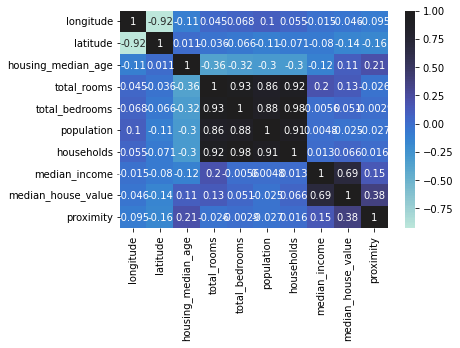

In [ ]:
sns.heatmap(df_houses.corr(), annot=True, center=1.0)

In [ ]:
df_houses['groupes_rooms']=df_houses['total_rooms'].apply(lambda x: 'very few rooms' if x <=1447.75 else 'few rooms' if 1447.75<x<=2127 else 'many rooms' if 2127<x<=3148 else 'many many rooms')
df_houses.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   proximity    groupes_rooms  
0        2.0   very few rooms  
1        2.0  many many rooms  
2        2.0        few rooms  
3        2.0   very few rooms  
4        2.0        few rooms

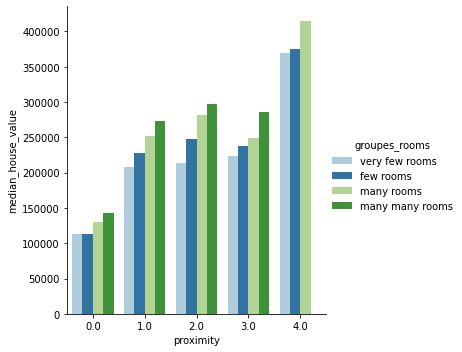

In [ ]:
sns.catplot(data=df_houses,x='proximity',y='median_house_value',hue='groupes_rooms', hue_order= ['very few rooms', 'few rooms', 'many rooms', 'many many rooms'],kind='bar',ci=None)
plt.show()

Représentation du prix médian de la maison en fonction de la proximité à l'océan et selon le nombre total de pièces

In [ ]:
#On remarque que la proximité à l'océan, tout comme le nombre total de pièces, influe fortement sur le prix de la maison

#On trace le prix median par rapport au revenu median

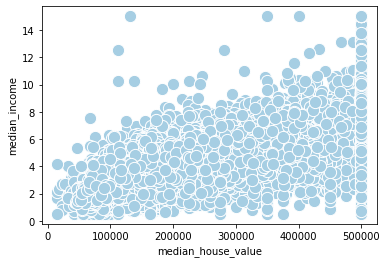

In [ ]:
sns.scatterplot(data= df_houses, x='median_house_value', y='median_income', s=150)
#sns.lineplot(data= df_houses, x='median_house_value', y='median_income', color='red', label='regression line', linewidth=2.0 )

###1er modele de Machine Learning: Regression linéaire
On va essayer de prédire la valeur médian du bien (median_house_value) à partir de la proximité à la mer, le revenu median puis l'age moyen et ou le total de pieces
Avec un modèle de Régression Linéaire car la variable est continue

In [ ]:
#X = df_houses[['median_income']]
X = df_houses[['median_income','proximity']]
#X = df_houses[['median_income','total_rooms','housing_median_age']]
#X = df_houses[['median_income','total_rooms']]
#X = df_houses[['median_income','housing_median_age']]
y = df_houses['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53, train_size=0.75)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_model.score(X_train, y_train)

0.5560782032337444

In [ ]:
linear_model.score(X_test, y_test)

0.5456212321284484

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [ ]:
y_pred = linear_model.predict(X_test)
print( 'MAE : ', mean_absolute_error(y_test, y_pred))
print( 'RMSE : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print(y_test.mean(), y_pred.mean())

MAE :  56392.86139091601
RMSE :  77750.32759446323
208339.21220930232 206873.40117180758


In [ ]:
linear_model_pred=pd.DataFrame()

In [ ]:
linear_model_pred['Prix reel']= y_test
linear_model_pred['Prix predit']= y_pred

In [ ]:
linear_model_pred.sample(15)

Prix reel    Prix predit
14899   121900.0  209711.090185
578     248600.0  268534.970260
8509    238000.0  192440.763209
1407    179300.0  187073.300949
12670    93100.0  157153.428464
11022   231400.0  196928.934258
8608    294000.0  190459.884936
15240   369100.0  418058.151261
1016    350000.0  268199.592776
4456    148800.0  156059.672085
15248   382100.0  339864.151228
19748   128800.0  187139.558233
8522    227300.0  268778.664703
20378   337500.0  428013.234395
7745    212300.0  248014.537132

#On applique une PCA pour réduire le nombre de variables et la dimension


In [ ]:
df_variables = df_houses.drop(['longitude','latitude','median_house_value','ocean_proximity','groupes_rooms'],axis=1)

In [ ]:
df_variables.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  proximity  
0         8.3252        2.0  
1         8.3014        2.0  
2         7.2574        2.0  
3         5.6431        2.0  
4         3.8462        2.0

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(df_variables)

In [ ]:
pca.explained_variance_ratio_

array([0.95015398, 0.04470938, 0.00466435])

In [ ]:
pd.DataFrame(pca.components_, columns=df_variables.columns, index=['Var1', 'Var2', 'Var3'])

housing_median_age  total_rooms  total_bedrooms  population  households  \
Var1           -0.001819     0.881711        0.162121    0.418098    0.146604   
Var2            0.001591    -0.446804        0.049363    0.887461    0.101675   
Var3           -0.004002     0.150845       -0.742509    0.188828   -0.624689   

      median_income  proximity  
Var1       0.000120  -0.000010  
Var2      -0.001254  -0.000003  
Var3       0.004150  -0.000571

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['Var1', 'Var2', 'Var3'])
df_pca['median_house_value'] = df_houses['median_house_value']
df_pca.head()

Var1         Var2        Var3  median_house_value
0 -2130.521549  -252.964589   63.749720            452600.0
1  4528.858313 -1035.512575   36.889664            358500.0
2 -1522.861929  -352.604608  107.950991            352100.0
3 -1653.657509  -204.855148   30.888781            341300.0
4 -1326.327380  -350.073991   27.050803            342200.0

In [ ]:
X_p = df_pca[['Var1','Var2', 'Var3']]
y_p = df_pca['median_house_value']

In [ ]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, random_state=53, train_size=0.75)
linear_model = LinearRegression()
linear_model.fit(X_train_p, y_train_p)

LinearRegression()

In [ ]:
linear_model.score(X_train_p, y_train_p)

0.09187584617053979

In [ ]:
linear_model.score(X_test_p, y_test_p)

0.09714937997894668

#Division de la DataSet


In [ ]:
#On ne garde que les variables que nous allons utiliser pour la prédiction
df_houses_2 =  pd.DataFrame(data= df_houses,columns=['total_rooms','median_income','median_house_value','proximity'])
df_houses_2

total_rooms  median_income  median_house_value  proximity
0            880.0         8.3252            452600.0        2.0
1           7099.0         8.3014            358500.0        2.0
2           1467.0         7.2574            352100.0        2.0
3           1274.0         5.6431            341300.0        2.0
4           1627.0         3.8462            342200.0        2.0
...            ...            ...                 ...        ...
20635       1665.0         1.5603             78100.0        0.0
20636        697.0         2.5568             77100.0        0.0
20637       2254.0         1.7000             92300.0        0.0
20638       1860.0         1.8672             84700.0        0.0
20639       2785.0         2.3886             89400.0        0.0

[20640 rows x 4 columns]

In [ ]:
#On divise la DataSet par nombre de pièces
df_houses_21 = df_houses_2[df_houses_2['total_rooms'] <= 6000]
df_houses_22 = df_houses_2[df_houses_2['total_rooms'] > 6000]

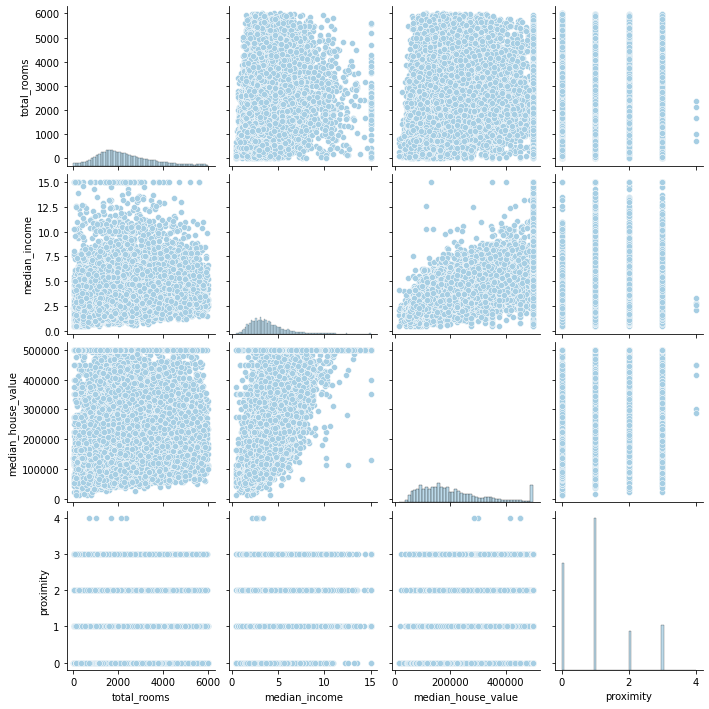

In [ ]:
sns.pairplot(df_houses_21)

Régression pour la première dataset

In [ ]:
X1 = df_houses_21[['median_income','total_rooms','proximity']]
y1 = df_houses_21['median_house_value']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=53, train_size=0.75)
linear_model = LinearRegression()
linear_model.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
linear_model.score(X_train1, y_train1)

0.5426079954991732

In [ ]:
linear_model.score(X_test1, y_test1)

0.5533333044122885

Régression pour la deuxième dataset

In [ ]:
X2 = df_houses_22[['median_income','total_rooms','proximity']]
y2 = df_houses_22['median_house_value']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=53, train_size=0.75)
linear_model = LinearRegression()
linear_model.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
pred_y2 = linear_model.predict(X2_test)
print( 'MAE : ', mean_absolute_error(y2_test, pred_y2))
print( 'RMSE : ', math.sqrt(mean_squared_error(y2_test, pred_y2)))
print("Moyenne des prix predits: ", y2_test.mean(), "\nMoyenne des prix reels: ",pred_y2.mean())

MAE :  47386.08104069851
RMSE :  64894.73357385665
Moyenne des prix predits:  242902.5298245614 
Moyenne des prix reels:  243755.44203832478


In [ ]:
linear_model.score(X2_train, y2_train)

0.6845412789156445

In [ ]:
linear_model.score(X2_test, y2_test)

0.6957090149618793



```
# `Ce texte est au format code`
```

#Observation du modèle
Le meilleur modèle de régression pour prédire la valeur est d'utiliser le revenu median et la proximité à la mer, la qualité de la prédiction se dégrade avec l'age median et le nombre de chambre.

On ajoute un modèle de régression linéaire avec la méthode KNN

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=100, weights='distance', metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

In [ ]:
pred_y2 = knn.predict(X_test)
print( 'MAE : ', mean_absolute_error(y_test, pred_y2))
print( 'RMSE : ', math.sqrt(mean_squared_error(y_test, pred_y2)))
print("Moyenne des prix predits: ", y_test.mean(), "\nMoyenne des prix reels: ",pred_y2.mean())

MAE :  257779.80475671735
RMSE :  276207.775855662
Moyenne des prix predits:  208339.21220930232 
Moyenne des prix reels:  464458.0118192549


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
knn.score(X_train_scaled, y_train)

0.9370748581745603

In [ ]:
knn.score(X_test_scaled, y_test)

0.4792477069913944

###2ème modéle de Machine Learning: Decision Tree
Nous allons dans cette partie essayer de prédire la valeur médiane du bien en fonction de: nombre des chambres, age médian, revenu médian, proximité à l'océan. Nous allons essayer plusieurs tailles d'arbres pour décider finalement de la taille qui donne le meilleur résultat.

In [ ]:
valeurs_aberrantes_median_price = []
df_houses_copy = df_houses

def detect_outliers_iqr(column_name):
    df_houses_copy.sort_values(column_name)
    q1 = np.percentile(df_houses_copy[column_name], 25)
    q3 = np.percentile(df_houses_copy[column_name], 75)
    # imprimer(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # imprimer(lwr_bound, upr_bound)
    for i in df_houses_copy[column_name]:
        if i<lwr_bound or i>upr_bound:
            valeurs_aberrantes_median_price.append(i)
    return (valeurs_aberrantes_median_price)


In [ ]:
df_houses_copy["housevalue/income"]=df_houses_copy["median_house_value"]/df_houses_copy["median_income"]

In [ ]:
l=detect_outliers_iqr("housevalue/income")

In [ ]:
l.sort()
l

In [ ]:
df_houses_copy = df_houses_copy.drop(df_houses_copy[df_houses_copy['housevalue/income']>106865.51568548293].index)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#colonnes sur lesquelles va porter l'entrainement de notre modèle
features = ['total_bedrooms','housing_median_age','median_income','proximity']

y2 = df_houses_copy['median_house_value']
X2 = df_houses_copy[features]

train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, random_state=53, train_size=0.75)

In [ ]:
max_nodes_list=[5,10,20,30,40,50,60,70,75,80,85,90,95,100,105,110,115,120,150,200]

MAE=[]
for max_nodes in max_nodes_list:
    decision_tree_model = DecisionTreeRegressor(random_state=53, max_leaf_nodes=max_nodes)
    decision_tree_model.fit(train_X2, train_y2)
    price_predictions = decision_tree_model.predict(test_X2)
    mae = mean_absolute_error(price_predictions, test_y2)
    MAE.append((mae, max_nodes))

MAE.sort()
print("erreur moyenne: ",MAE[0][0], "\nmax nodes:", MAE[0][1])



erreur moyenne:  41366.58438412352 
max nodes: 110


In [ ]:
df_houses


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  proximity    groupes_rooms  housevalue/income  
0            NEAR BAY        2.0   very few rooms       54365.060299  
1            NEAR BAY        2.0  many many rooms       43185.486785  
2            NEAR BAY        2.0        few rooms       48515.997465  
3            NEAR BAY        2.0   very few rooms       60480.941327  
4            NEAR BAY        2.0        few rooms       88970.932349  
...               ...        ...              ...                ...  
20635          INLAND        0.0        few rooms       50054.476703  
20636          INLAND        0.0   very few rooms       30154.881101  
20637          INLAND        0.0       many rooms       54294.117647  
20638          INLAND        0.0        few rooms       45362.039417  
20639          INLAND        0.0       many rooms       37427.781964  

[20640 rows x 13 columns]

In [ ]:
model2= DecisionTreeRegressor(random_state=53, max_leaf_nodes=MAE[0][1])
model2.fit(train_X2, train_y2)
model2.score(train_X2, train_y2)

0.7649409410476371

In [ ]:
model2.score(test_X2, test_y2)

0.7332425673295737

In [ ]:
pred_y2 = model2.predict(test_X2)
print( 'MAE : ', mean_absolute_error(test_y2, pred_y2))
print( 'RMSE : ', math.sqrt(mean_squared_error(test_y2, pred_y2)))
print("Moyenne des prix predits: ", test_y2.mean(), "\nMoyenne des prix reels: ",pred_y2.mean())

MAE :  41366.58438412352
RMSE :  56830.96611926899
Moyenne des prix predits:  200366.19624643002 
Moyenne des prix reels:  200752.34058451687


In [ ]:
tree_pred=pd.DataFrame()

In [ ]:
tree_pred['Prix reel']= test_y2
tree_pred['Prix predit']= pred_y2

In [ ]:
tree_pred.sort_values("Prix reel")

Prix reel    Prix predit
5887    17500.0  148313.814757
3027    26600.0  102135.143770
3028    26900.0   84200.595618
2778    30000.0   71199.479275
2022    34400.0   84200.595618
...         ...            ...
8584   500001.0  473633.703390
8187   500001.0  399414.875969
5291   500001.0  492272.900383
6716   500001.0  275644.805970
9857   500001.0  319959.280255

[4902 rows x 2 columns]

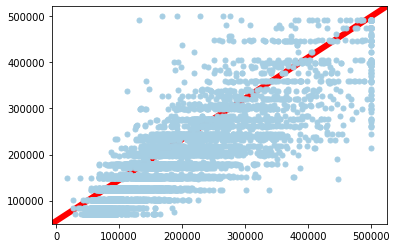

In [ ]:
x=tree_pred["Prix reel"].tolist()
y=tree_pred["Prix predit"].tolist()
fig, ax = plt.subplots()
ax.scatter(x, y, s=25,  cmap=plt.cm.coolwarm, zorder=10)
ax.plot([0,1],[0,1], transform=ax.transAxes, linewidth=6, color="red")

In [ ]:
model2.predict(df_houses[['total_rooms','housing_median_age','median_income','proximity']].head(5))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- total_rooms
Feature names seen at fit time, yet now missing:
- total_bedrooms

  warnings.warn(message, FutureWarning)


array([473633.70338983, 399414.87596899, 446100.5       , 448406.2       ,
       307743.47826087])

In [ ]:
df_houses[['total_rooms','housing_median_age','median_income','proximity']].head(1)

total_rooms  housing_median_age  median_income  proximity
0        880.0                41.0         8.3252        2.0